In [1]:
from ConversionUtilities import *
from matplotlib import pyplot as plt
from IPython.display import Audio
import numpy as np


In [2]:
def encodeLoad(load, character):
    """
    Encodes the raw data in the given RTP packet with a character. The given character replaces the first byte in the
    RTP payload.
    @param packet: preconfigured Scapy RTP packet
    @param character: the ascii (256bit) character to encode
    @return: the same packet with encoded payload
    """          
    return hex(ord(character))[2:] + load[2:]

def encodeLoad2(rawData, message, bitCounter):
    k = 12  # Audio begins at 12th bit of raw load
    rawData = bytearray.fromhex(rawData)
    while bitCounter < len(message) << 4 and k < len(rawData):
        # Encode the least significant bit.
        rawData[k] = rawData[k] | 1 if (ord(message[bitCounter >> 4]) >> (bitCounter & 7)) & 1 else rawData[k] & ~1
        bitCounter += 1
        k += 1
    
    return str(rawData), bitCounter

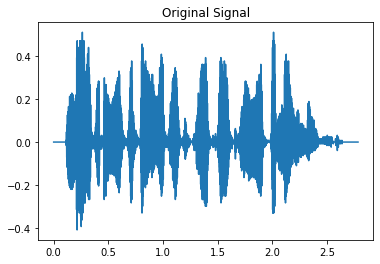

In [3]:
file = open("VoicemailASCIIHex", "r")  # Original voicemail file
lines = file.readlines()

originalIntensity = []
for line in lines:
    originalIntensity += getAudacityFormat(line)   

plt.plot(np.arange(0, len(originalIntensity))/8000, originalIntensity)
plt.title("Original Signal")
plt.show()

Audio(np.array(originalIntensity), rate=8000)



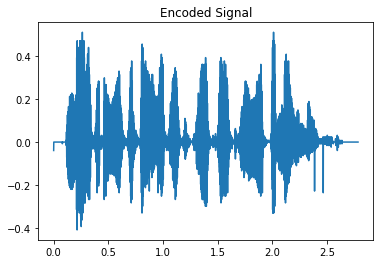

In [4]:
message = "Hello World! I am in the audio!"
if len(message) % 2 != 0:
    message += " "

sep = 4
for i in range(len(message)):
    lines[i * sep] = encodeLoad(lines[i * sep], message[i])
    
    
intensity = []
for line in lines:
    intensity += getAudacityFormat(line)     
    
plt.plot(np.arange(0, len(intensity))/8000, intensity)
plt.title("Encoded Signal")
plt.show()

Audio(np.array(intensity), rate=8000)



In [5]:
file = open("VoicemailASCIIHex", "r")  # Original voicemail file
lines = file.readlines()
print(lines[:5])

bitCounter = 0
bMessage = message.encode()

for i in range(len(message)):
    lines[i], bitCounter = encodeLoad2(lines[i], message, bitCounter)


intensity = []
for line in lines:
    intensity += getAudacityFormat(line)     
    
plt.plot(np.arange(0, len(intensity))/8000, intensity)
plt.title("Encoded Signal")
plt.show()

Audio(np.array(intensity), rate=8000)







['7e7e7e7d7d7dfffffffefffffefefefefefefefefe7effff7e7e7effffff7e7e7effffff7e7e7e7efefffffffffffefeff7efffffefffffeffff7e7eff7e7e7e7d7d7effffff7e7e7e7e7e7effffff7e7e7d7e7e7d7e7e7d7e7e7d7e7e7d7e7effffff7e7e7e7d7e7e7d7d7eff7e7e7e7e7e7d7e7effff7e7e7e7d7e7effffff7d7e7efffffffefffffefefffefefffefefffefefffefefffefefffefefffefe\n', 'ffff7effff7e7efffeffff7e7e7e7d7e7eff7e7efeffff7e7e7e7d7e7eff7eff7e7e7e7d7e7e7d7e7d7d7e7d7e7e7d7e7eff7eff7e7e7efffffffefffffefefe7effff7e7e7e7d7e7eff7efffefffffffefffefefefefefefefefefefefefefefefefefefefefefefefefe7effff7e7e7efffffffeffffffffff7efffffefffffefffe7effff7e7e7effffff7e7e7e7d7e7e7d7e7e7d7e7eff7efffefffffeff\n', '7efffffeffff7e7efffeffff7e7efffffffffefefffefefffefefefefefe7efffefefffffefefeff7efefe7e7eff7e7e7dffff7efffffe7e7eff7e7e7e7d7e7d7d7d7d7d7d7eff7e7e7d7e7eff7effff7e7eff7e7e7effff7e7d7e7e7d7e7e7e7e7effff7efffeff7e7eff7e7e7e7d7e7d7d7d7d7d7d7e7e7d7d7e7d7d7d7d7d7d7e7d7d7e7e7efffffffeffff7effff7e7e7e7e7e7d7d7e7e7e7e7e7d7d7e7e\n', 'ff7e7efffffffefefefd

Error: Odd-length string

In [ ]:
file = open("VoicemailASCIIHex", "r")  # Original voicemail file
lines = file.readlines()
print(lines[:5])

bitCounter = 0
bMessage = message.encode()

for i in range(len(message)):
    print(len(lines[i]))
    lines[i], bitCounter = encodeLoad2(lines[i], message, bitCounter)


intensity = []
for line in lines:
    intensity += getAudacityFormat(line)     
    
plt.plot(np.arange(0, len(intensity))/8000, intensity)
plt.title("Encoded Signal")
plt.show()

Audio(np.array(intensity), rate=8000)







In [8]:
file = open("VoicemailASCIIHex", "r")  # Original voicemail file
lines = file.readlines()
print(lines[:5])

bitCounter = 0
bMessage = message.encode()

for i in range(len(message)):
    print(len(lines[i]))
    lines[i], bitCounter = encodeLoad2(lines[i], message, bitCounter)


intensity = []
for line in lines:
    intensity += getAudacityFormat(line)     
    
plt.plot(np.arange(0, len(intensity))/8000, intensity)
plt.title("Encoded Signal")
plt.show()

Audio(np.array(intensity), rate=8000)







['7e7e7e7d7d7dfffffffefffffefefefefefefefefe7effff7e7e7effffff7e7e7effffff7e7e7e7efefffffffffffefeff7efffffefffffeffff7e7eff7e7e7e7d7d7effffff7e7e7e7e7e7effffff7e7e7d7e7e7d7e7e7d7e7e7d7e7e7d7e7effffff7e7e7e7d7e7e7d7d7eff7e7e7e7e7e7d7e7effff7e7e7e7d7e7effffff7d7e7efffffffefffffefefffefefffefefffefefffefefffefefffefefffefe\n', 'ffff7effff7e7efffeffff7e7e7e7d7e7eff7e7efeffff7e7e7e7d7e7eff7eff7e7e7e7d7e7e7d7e7d7d7e7d7e7e7d7e7eff7eff7e7e7efffffffefffffefefe7effff7e7e7e7d7e7eff7efffefffffffefffefefefefefefefefefefefefefefefefefefefefefefefefe7effff7e7e7efffffffeffffffffff7efffffefffffefffe7effff7e7e7effffff7e7e7e7d7e7e7d7e7e7d7e7eff7efffefffffeff\n', '7efffffeffff7e7efffeffff7e7efffffffffefefffefefffefefefefefe7efffefefffffefefeff7efefe7e7eff7e7e7dffff7efffffe7e7eff7e7e7e7d7e7d7d7d7d7d7d7eff7e7e7d7e7eff7effff7e7eff7e7e7effff7e7d7e7e7d7e7e7e7e7effff7efffeff7e7eff7e7e7e7d7e7d7d7d7d7d7d7e7e7d7d7e7d7d7d7d7d7d7e7d7d7e7e7efffffffeffff7effff7e7e7e7e7e7d7d7e7e7e7e7e7d7d7e7e\n', 'ff7e7efffffffefefefd

Error: Odd-length string

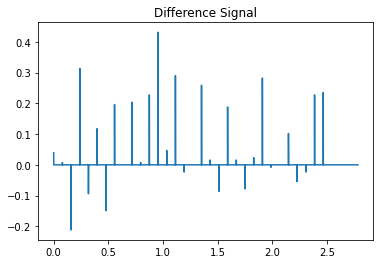

In [5]:
plt.plot(np.arange(0, len(intensity))/8000, np.array(originalIntensity) - np.array(intensity))
plt.title("Difference Signal")
plt.show()

Audio(np.array(originalIntensity) - np.array(intensity), rate=8000)